**6) Data Analytics III**
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,recall_score,ConfusionMatrixDisplay

In [8]:
labelencoder = LabelEncoder()
df['species'] = labelencoder.fit_transform(df['species'])

In [10]:
x = df.drop(columns=['species'])
y = df['species']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [27]:
predicted = model.predict(x_test)
predicted

array([0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 2, 2, 1])

In [30]:
precision_score(y_test, predicted, average='micro')

0.9333333333333333

In [31]:
recall_score(y_test, predicted)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [32]:
accuracy_score(y_test, predicted)

0.9333333333333333

In [33]:
cm = confusion_matrix(y_test, predicted)
cm

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

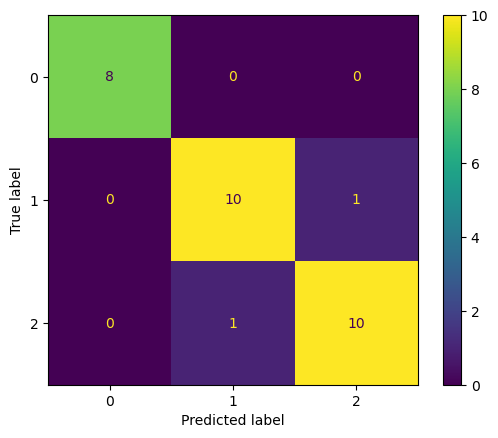

In [34]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()